# Predikcia zárobku filmov
## Zdroj dát: [Kaggle](https://www.kaggle.com/stephanerappeneau/350-000-movies-from-themoviedborg) (ThemovieDB)


Successfully loaded the dataset from data/themoviedb/AllMoviesDetailsCleaned.csv
Rows: 329044, columns: 22
Dropping revenue values below the following value: 0
Dropped 320355 entries


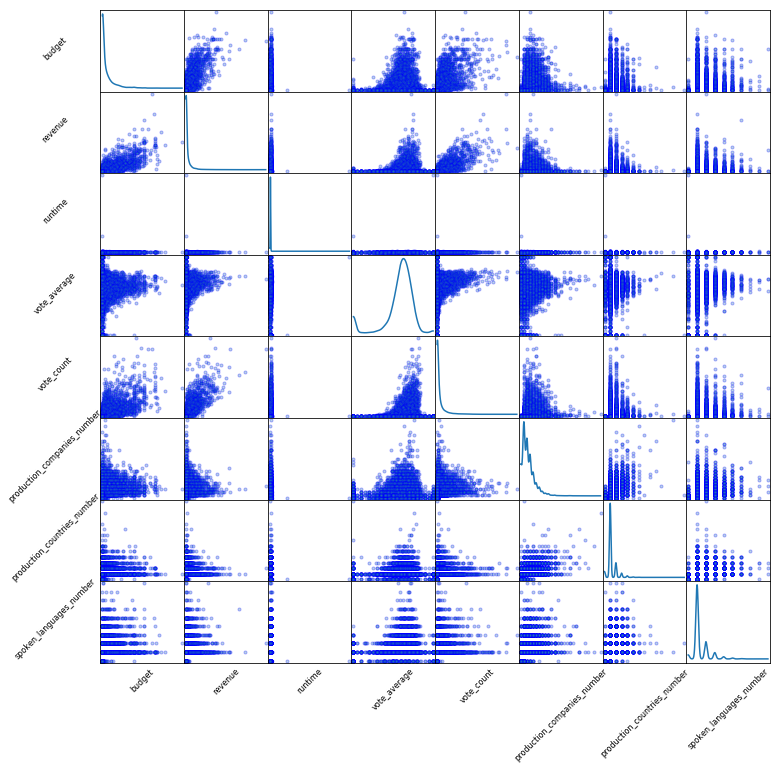

In [7]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import linear_model
from pandas.plotting import scatter_matrix
    
    
# Loads the dataset CSV file from a given path
def load_dataset(filepath, data_delimiter):
    # Load the file to a dataframe via Pandas
    try:
        df = pd.read_csv(filepath, delimiter=data_delimiter, low_memory=False)
    
        print("Successfully loaded the dataset from " + filepath)
        print("Rows: " + str(df.shape[0]) + ", columns: " + str(df.shape[1]))
        
        return df
    except e:
        print("Failed to load the dataset from " + filepath)
        return
   
   
def filter_by_lower_threshold(df, colname, threshold, equal=False):
    print("Dropping '{}' values below the following value: {}".format(colname, threshold))
    
    rows_before = df.shape[0]
    df = df[df[colname] > threshold]
    
    print("Dropped {} entries".format(rows_before - df.shape[0]))
    return df


def filter_by_upper_threshold(df, colname, threshold, equal=False):
    print("Dropping values above the following value: " + str(threshold))
    print("Rows before drop: " + df.shape[1])
    
    
def filter_nan_values(df, colname, keep_zeros=True):
    print("TODO")
    
df = load_dataset('data/themoviedb/AllMoviesDetailsCleaned.csv', ';')

# Drop zero/NaN value rows
df = filter_by_lower_threshold(df, 'revenue', 0)
# df = df[df['revenue'] > 0]
# df = df[df['budget'] > 0]

# Drop unnecessary columns
df = df.drop(['id'], axis=1)

# User ratings histogram
"""
pd.set_option('display.float_format', lambda x: '%.0f' % x)
print(df.describe())

import matplotlib.mlab as mlab
plt.figure(1)
df['vote_average'].plot.hist(alpha=0.5, bins=10, range=(0, 10), normed=True)
plt.xlabel("Vote_average")
plt.ylabel("Percentage")
plt.show()
"""

# Scatter plot of revenue & budget and a basic linear regression model
# plt.figure(dpi=300)
"""
plt.scatter(df['budget'], df['revenue'])
plt.xlabel("Budget")
plt.ylabel("Revenue")

target = pd.DataFrame(df['revenue'])
data = df['budget']
data = data.values.reshape(data.shape[0], 1)

x = data
y = target['revenue']

# Create a simple linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)

plt.plot(x, predictions, color='yellow')
plt.show()

# print lm.coef_
# print lm.intercept_
print "Simple linear regression similarity score: " + str(lm.score(x, y))
"""

# Scatter matrices plot
sm = scatter_matrix(df, alpha=0.3, figsize=(12, 12), diagonal='kde', grid=True, edgecolors='blue')

#Change label rotation
for s in sm.reshape(-1):
    s.xaxis.label.set_size(8)
    s.xaxis.label.set_rotation(45)
    
    s.yaxis.label.set_size(8)
    s.yaxis.label.set_rotation(45) 

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.5, 0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

    
plt.savefig("scatter_matrix.png", dpi=300)
plt.show()

